In [ ]:
import pandas as pd

from google.colab import drive
drive.mount('/content/drive/', force_remount = True)

# load data
music = pd.read_csv('/content/drive/MyDrive/DSBA6156_APML/spotify-2023.csv', encoding='latin1')

# Display the first few rows of the dataset
music.head()



Mounted at /content/drive/


,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,144,A,Minor,65,23,80,14,63,11,6


In [ ]:
# Check for missing values in the dataset
missing_values = music.isnull().sum()

# Display columns with missing values
missing_values[missing_values > 0]


in_shazam_charts    50
key                 95
dtype: int64

In [ ]:
# Define continuous and categorical features
numerical_features = [
   'artist_count', 'released_year', 'released_month', 'released_day',
    'in_spotify_playlists', 'in_spotify_charts', 'in_apple_playlists',
    'in_apple_charts', 'in_deezer_playlists', 'in_deezer_charts', 'in_shazam_charts',
    'bpm', 'danceability_%', 'valence_%', 'energy_%', 'acousticness_%',
    'instrumentalness_%', 'liveness_%', 'speechiness_%', 'streams'
]

music = music[music['track_name'] != 'Love Grows (Where My Rosemary Goes)']

# replace commas in continous features
music[numerical_features] = music[numerical_features].replace({',': ''}, regex=True)
music[numerical_features] = music[numerical_features].apply(pd.to_numeric)

<ipython-input-3-b4c40e06ffe0>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  music[numerical_features] = music[numerical_features].replace({',': ''}, regex=True)
<ipython-input-3-b4c40e06ffe0>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  music[numerical_features] = music[numerical_features].apply(pd.to_numeric)


In [ ]:
# Fill missing values
music['in_shazam_charts'].fillna(music['in_shazam_charts'].median(), inplace=True)
music['key'].fillna("Unknown", inplace=True)

# Define the threshold for "Highly Streamed"  --Create the target variable "Highly Streamed": We'll label tracks as "Highly Streamed" if their stream count is above the 75th percentile--
threshold = music['streams'].quantile(0.75)

# Create the target variable
music['Highly Streamed'] = (music['streams'] > threshold).astype(int)

# Check the distribution of the target variable ()
distribution = music['Highly Streamed'].value_counts()

distribution

<ipython-input-4-c239e08848f0>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  music['in_shazam_charts'].fillna(music['in_shazam_charts'].median(), inplace=True)
<ipython-input-4-c239e08848f0>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  music['key'].fillna("Unknown", inplace=True)
<ipython-input-4-c239e08848f0>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  music['Highly 

0    714
1    238
Name: Highly Streamed, dtype: int64

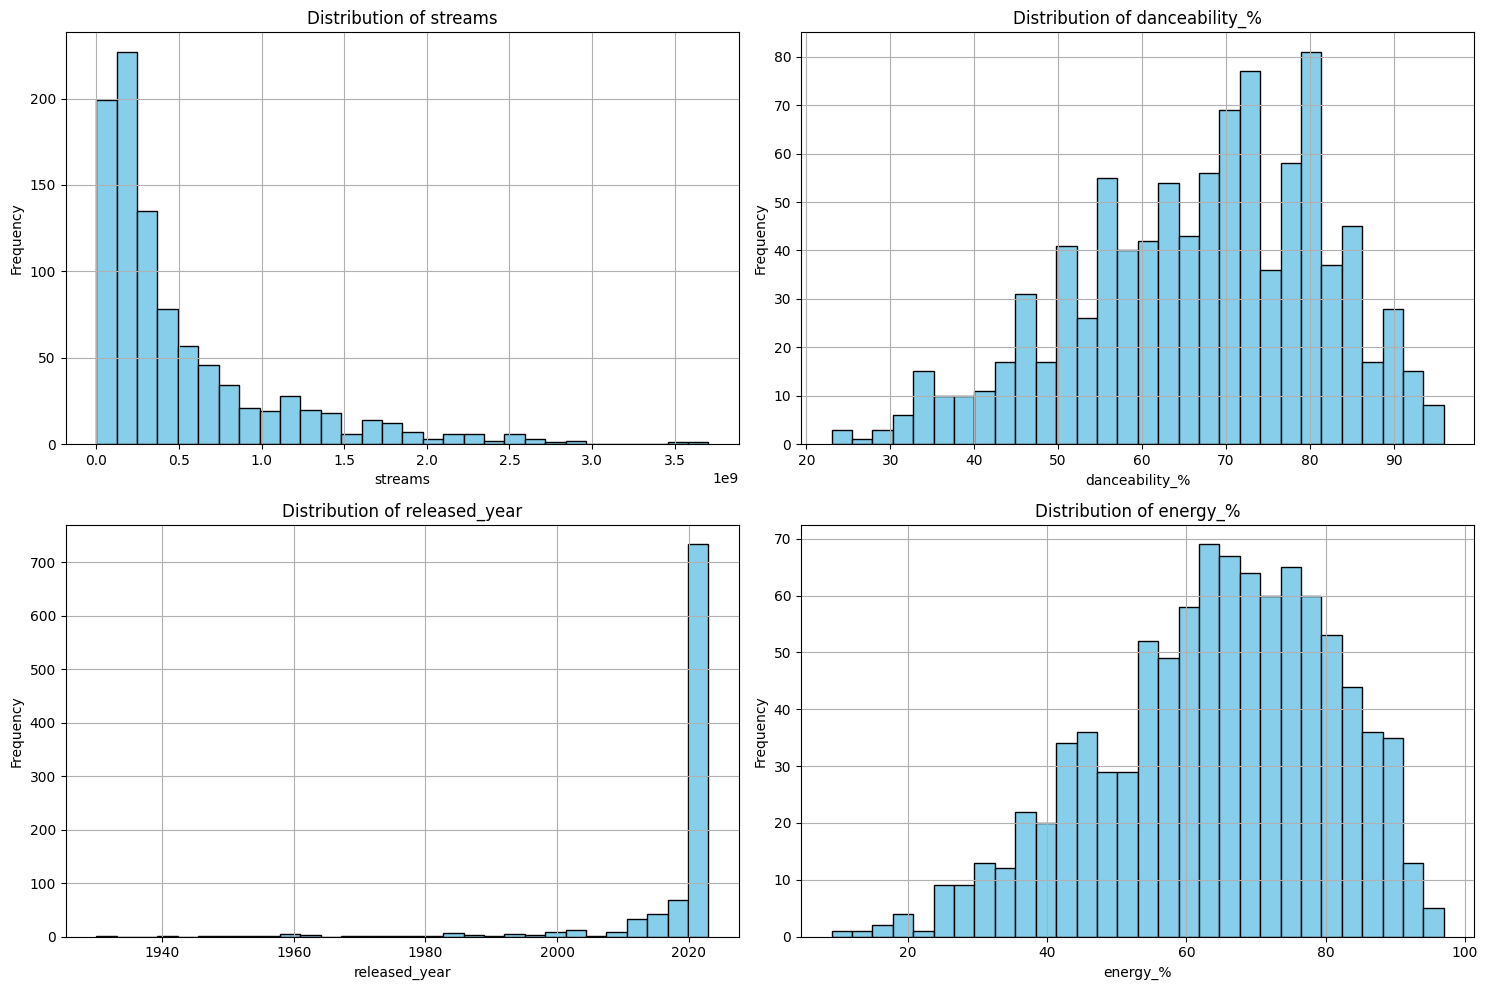

In [ ]:
import matplotlib.pyplot as plt

# List of features to visualize
features_to_visualize = ['streams', 'danceability_%', 'released_year', 'energy_%']

# Plotting distributions of the selected features
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))

for i, feature in enumerate(features_to_visualize):
    ax = axes[i//2, i%2]
    music[feature].hist(ax=ax, bins=30, color='skyblue', edgecolor='black')
    ax.set_title(f'Distribution of {feature}')
    ax.set_xlabel(feature)
    ax.set_ylabel('Frequency')

plt.tight_layout()
plt.show()


In [ ]:
from sklearn.model_selection import train_test_split

# Features and target variable
X = music.drop(["track_name", "artist(s)_name", "Highly Streamed", "streams",
                'in_spotify_playlists', 'in_spotify_charts', 'in_apple_playlists',
                'in_apple_charts', 'in_deezer_playlists', 'in_deezer_charts',
                'in_shazam_charts', 'released_year'], axis=1)
y = music["Highly Streamed"]

# Splitting the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Check the shape of the training and testing sets
X_train.shape, X_test.shape


((761, 13), (191, 13))

In [ ]:
# Define continuous and categorical features
continuous_features = [
   'artist_count', 'released_month', 'released_day',
    'bpm', 'danceability_%', 'valence_%', 'energy_%', 'acousticness_%',
    'instrumentalness_%', 'liveness_%', 'speechiness_%',
]
categorical_features = ['key', 'mode']

# Preprocessing: Scaling continuous features and one-hot encoding categorical features
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

# Create the column transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), continuous_features),
        ('cat', OneHotEncoder(drop='first'), categorical_features)
    ])

# Fit and transform the training data
X_train_scaled = preprocessor.fit_transform(X_train)

# Transform the testing data
X_test_scaled = preprocessor.transform(X_test)

X_train_scaled.shape, X_test_scaled.shape


((761, 23), (191, 23))

In [ ]:
# Import necessary libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
import numpy as np


# Name each model
logit = LogisticRegression()
knn = KNeighborsClassifier()
tree = DecisionTreeClassifier()
rf = RandomForestClassifier()
xgb = XGBClassifier()


# Run a grid search on each model
logit_grid = GridSearchCV(logit, param_grid= {'C':np.logspace(-3,3,7), 'max_iter': range(100, 1100, 100)}, return_train_score=True, scoring='roc_auc')
logit_grid.fit(X_train_scaled, y_train)
logit_best_params = logit_grid.best_params_

knn_grid = GridSearchCV(knn, param_grid= {'n_neighbors': [3, 5, 7, 9, 11]}, scoring='roc_auc')
knn_grid.fit(X_train_scaled, y_train)
knn_best_params = knn_grid.best_params_

tree_grid = GridSearchCV(tree, param_grid= {'max_depth':range(1, 21), 'min_samples_split': [2, 5, 10, 15, 20]}, scoring='roc_auc')
tree_grid.fit(X_train_scaled, y_train)
tree_best_params = tree_grid.best_params_

xgb_grid = GridSearchCV(xgb, param_grid= {'learning_rate': [0.01, 0.1, 0.2], 'n_estimators': [50, 100, 200], 'max_depth': [3, 4, 5], 'eval_metric':['logloss'], 'use_label_encoder': [False]}, scoring='roc_auc')
xgb_grid.fit(X_train_scaled, y_train)
xgb_best_params = xgb_grid.best_params_

In [ ]:
# Assuming you have X_train_scaled and y_train defined elsewhere
models = {
    "Logistic Regression": LogisticRegression(**logit_best_params),
    "KNN": KNeighborsClassifier(**knn_best_params),
    "Decision Tree": DecisionTreeClassifier(**tree_best_params),
    "Random Forest": RandomForestClassifier(random_state=42),
    "XGBoost": XGBClassifier(**xgb_best_params)
}

feature_importances = {}

# Train each model and get feature importances
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    if name == "Logistic Regression":
        # For logistic regression, use coefficients
        importance = dict(zip(X_train.columns, model.coef_[0]))
    elif name in ["Decision Tree", "Random Forest", "XGBoost"]:
        # For tree-based models, use feature_importances_
        importance = dict(zip(X_train.columns, model.feature_importances_))
    else:
        # KNN doesn't provide feature importance, so skip it
        continue
    sorted_importance = sorted(importance.items(), key=lambda x: abs(x[1]), reverse=True)
    feature_importances[name] = sorted_importance

# Now, 'feature_importances' is a dictionary where keys are model names and values are sorted feature importance lists



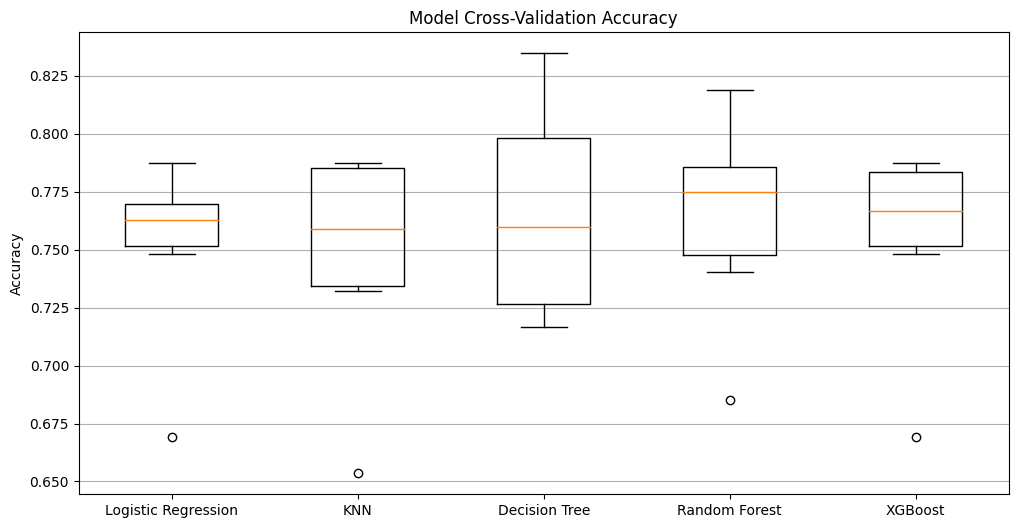

In [ ]:
# Extend the models dictionary to include Random Forest and XGBoost

# Train and evaluate each model using cross-validation
results_cross_val = []

for model in models.values():
    kf = KFold(n_splits=6, random_state=42, shuffle=True)
    cv_results = cross_val_score(model, X_train_scaled, y_train, cv=kf)
    results_cross_val.append(cv_results)

# Plotting the results
plt.figure(figsize=(12, 6))
plt.boxplot(results_cross_val, labels=models.keys(), vert=True)
plt.ylabel('Accuracy')
plt.title('Model Cross-Validation Accuracy')
plt.grid(True, axis='y')
plt.show()


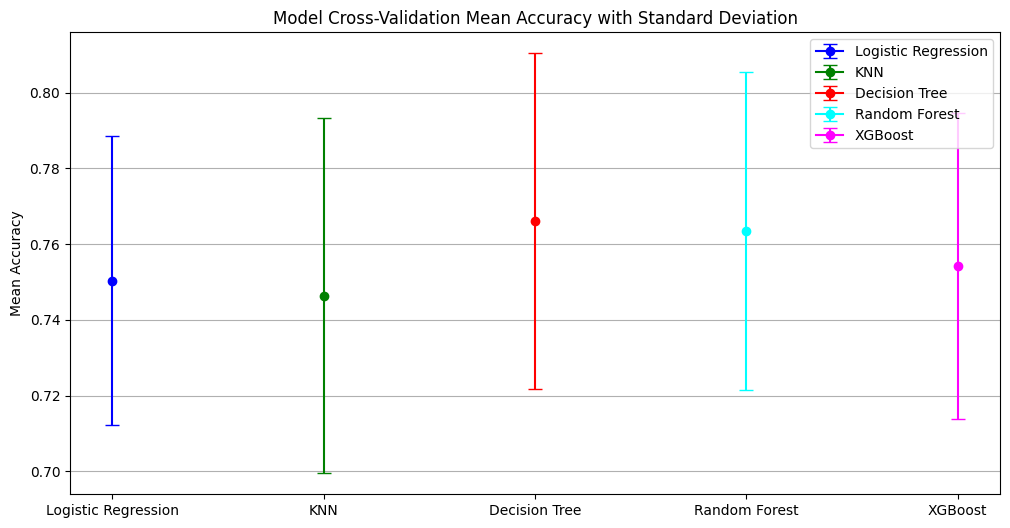

In [ ]:
# same thing in better vision- we can keep one of the two-

import numpy as np

# Calculate mean accuracies and standard deviations
mean_accuracies = [np.mean(result) for result in results_cross_val]
std_accuracies = [np.std(result) for result in results_cross_val]

# Define colors for each model
colors = [
    'blue', 'green', 'red', 'cyan', 'magenta'
]

# Plotting the results
plt.figure(figsize=(12, 6))
model_names = list(models.keys())
for i, (mean, std, color) in enumerate(zip(mean_accuracies, std_accuracies, colors)):
    plt.errorbar(i, mean, yerr=std, color=color, marker='o', capsize=5, label=model_names[i])

plt.xticks(range(len(models)), models.keys())
plt.ylabel('Mean Accuracy')
plt.title('Model Cross-Validation Mean Accuracy with Standard Deviation')
plt.grid(True, axis='y')
plt.legend(loc='best')
plt.show()


In [ ]:
results_score = []

# Train and evaluate each model using accuracy
for model in models.values():
    #kf = KFold(n_splits=6, random_state=42, shuffle=True)
    score_results = model.score(X_test_scaled, y_test)
    results_score.append(score_results)

results_score

[0.7486910994764397,
 0.7486910994764397,
 0.7696335078534031,
 0.7905759162303665,
 0.7486910994764397]

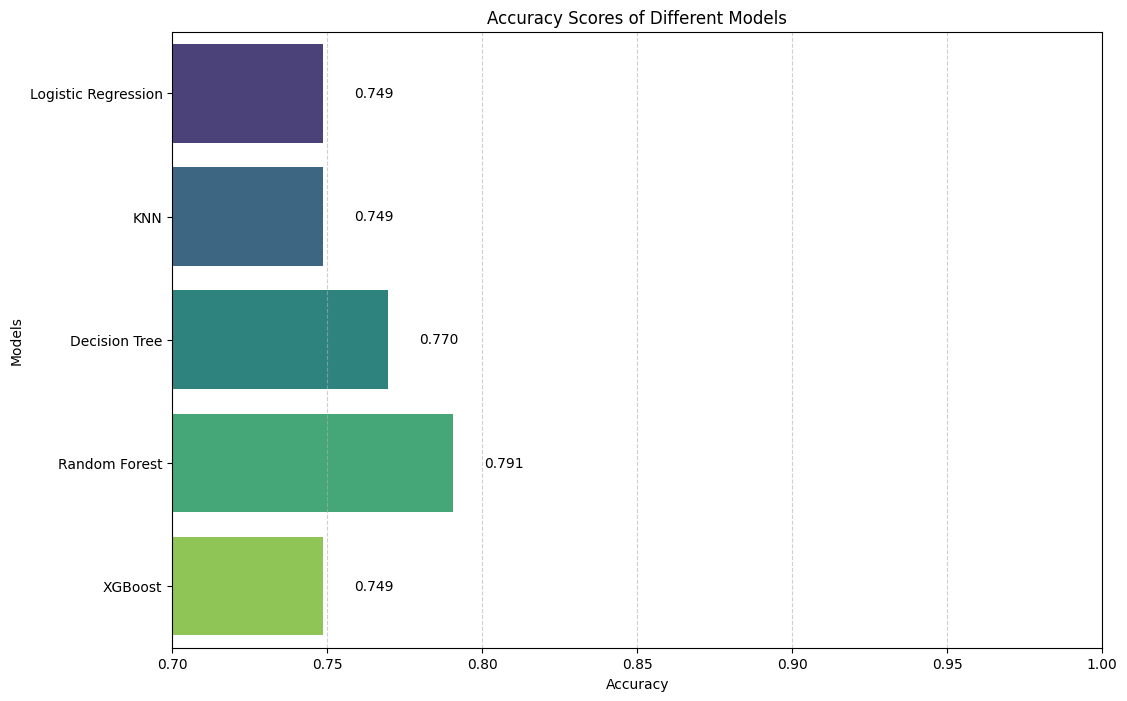

In [ ]:
import seaborn as sns

# Set a custom color palette
colors = sns.color_palette("viridis", len(models))

# Horizontal bar plot using seaborn
plt.figure(figsize=(12, 8))
sns.barplot(x=results_score, y=list(models.keys()), palette=colors)
plt.xlabel('Accuracy')
plt.ylabel('Models')
plt.title('Accuracy Scores of Different Models')
plt.xlim([0.7, 1.0])  # Set y-axis limits to focus on a specific range
plt.grid(axis='x', linestyle='--', alpha=0.6)  # Add grid lines for better reference

# Annotate bars with actual accuracy values
for i, v in enumerate(results_score):
    plt.text(v + 0.01, i, f'{v:.3f}', color='black', va='center')

plt.show()

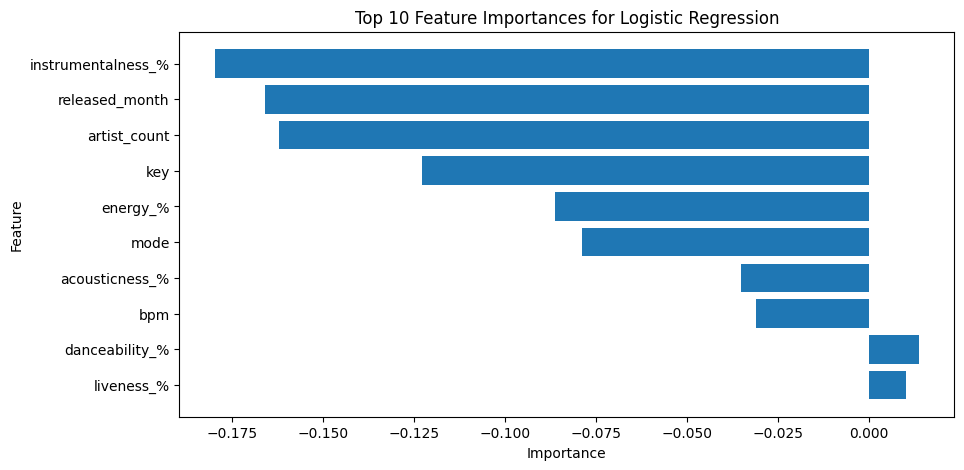

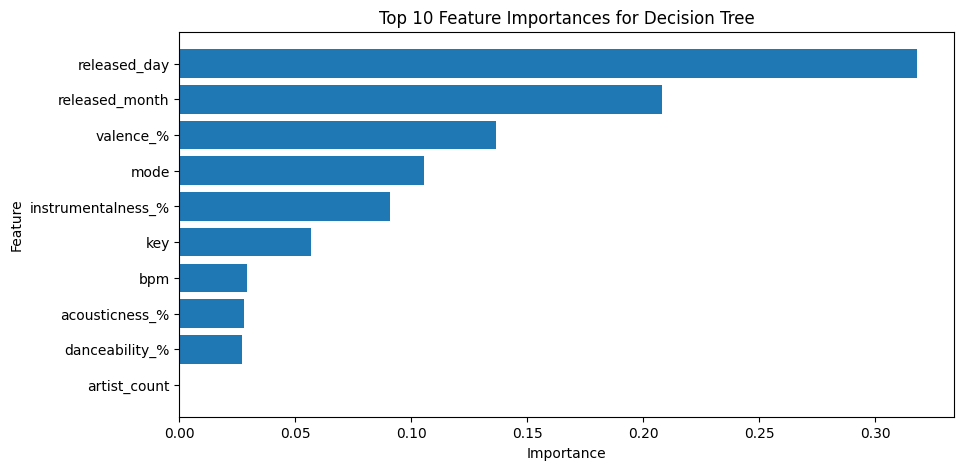

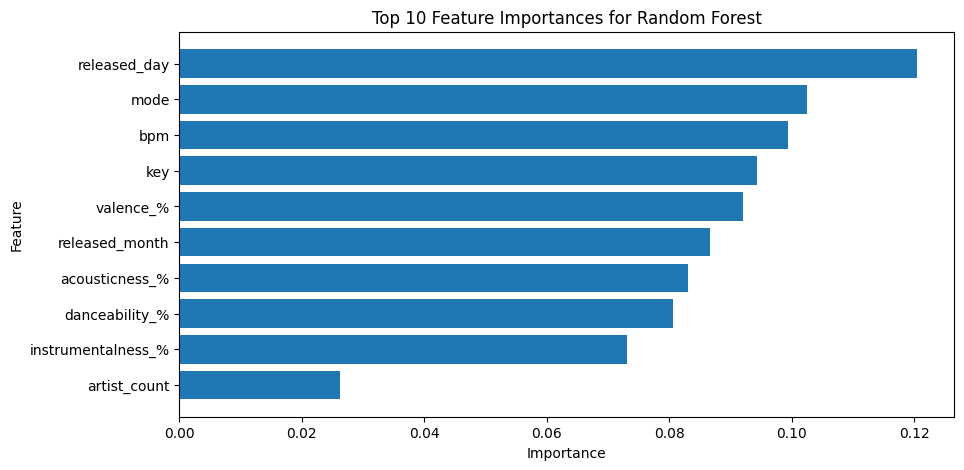

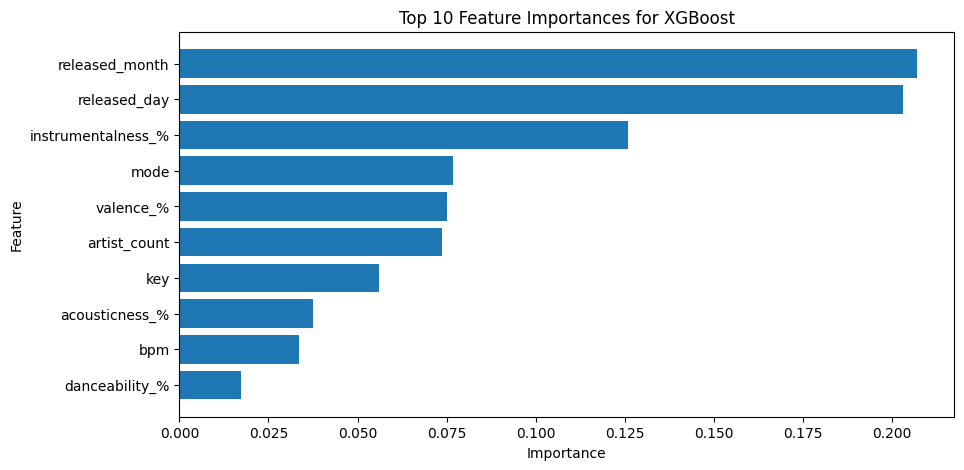

In [ ]:
import matplotlib.pyplot as plt

N = 10  # Number of top features to display for each model

# For each model, display the top N feature importances
for model_name, importances in feature_importances.items():
    features, values = zip(*importances[:N])

    plt.figure(figsize=(10, 5))
    plt.barh(features, values, align='center')
    plt.xlabel('Importance')
    plt.ylabel('Feature')
    plt.title(f'Top {N} Feature Importances for {model_name}')
    plt.gca().invert_yaxis()  # To display the most important feature at the top
    plt.show()


In [ ]:
mean_accuracies = [results_score.mean() for results_score in results_score]
best_model_index = np.argmax(mean_accuracies)
best_model_name = list(models.keys())[best_model_index]
best_model = list(models.values())[best_model_index]
best_model_accuracy = mean_accuracies[best_model_index]

print(f"Best model: {best_model_name} with accuracy: {best_model_accuracy:.4f}")


Best model: Random Forest with accuracy: 0.7906


In [ ]:
from sklearn.metrics import roc_auc_score, confusion_matrix, roc_curve

# Train the best model
best_model.fit(X_train_scaled, y_train)

# Predictions for ROC AUC and confusion matrix
y_pred = best_model.predict(X_test_scaled)
y_proba = best_model.predict_proba(X_test_scaled)[:, 1]

# ROC AUC
roc_auc = roc_auc_score(y_test, y_proba)
print(f"ROC AUC for {best_model_name}: {roc_auc:.4f}")

# Confusion Matrix
cf_matrix = confusion_matrix(y_test, y_pred)
print(f"Confusion Matrix for {best_model_name}:\n{cf_matrix}")


ROC AUC for Random Forest: 0.6812
Confusion Matrix for Random Forest:
[[141   2]
 [ 38  10]]


ROC AUC for Random Forest: 0.6812
Confusion Matrix for Random Forest:
[[141   2]
 [ 38  10]]


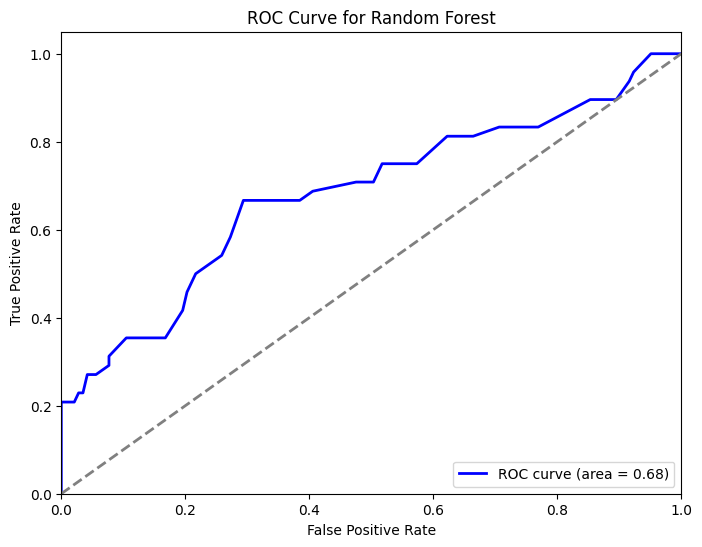

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score, confusion_matrix, roc_curve

# Assuming the best model is already defined and X_train_scaled, y_train are available

# Train the best model
best_model.fit(X_train_scaled, y_train)

# Predictions for ROC AUC and confusion matrix
y_pred = best_model.predict(X_test_scaled)
y_proba = best_model.predict_proba(X_test_scaled)[:, 1]

# ROC AUC
roc_auc = roc_auc_score(y_test, y_proba)
print(f"ROC AUC for {best_model_name}: {roc_auc:.4f}")

# Confusion Matrix
cf_matrix = confusion_matrix(y_test, y_pred)
print(f"Confusion Matrix for {best_model_name}:\n{cf_matrix}")

# Calculating ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_proba)

# Plotting ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(f'ROC Curve for {best_model_name}')
plt.legend(loc="lower right")
plt.show()
